In [1]:
"""#Data sci project workflow
Workflow with iris dataset
"""
#imports 
%matplotlib inline  

import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
#models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [11]:
#Load Dataset
url =  "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
(150, 5)
       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0

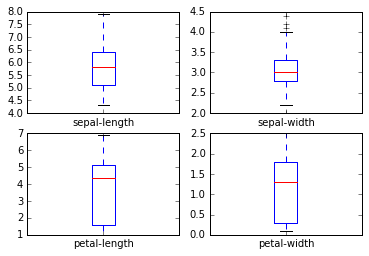

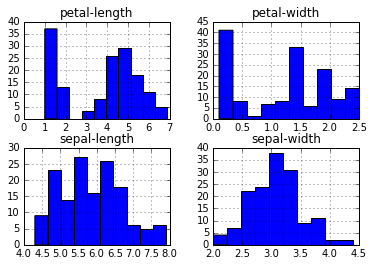

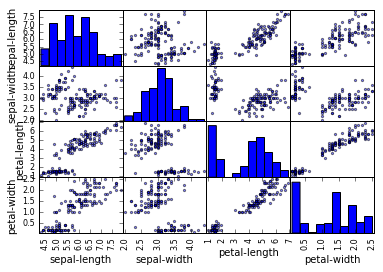

In [9]:
#EDA
print dataset.head(10)
print dataset.shape
print dataset.describe()
print(dataset.groupby('class').size())

#Data Viz
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

#histograms
dataset.hist()
plt.show()

#scatter matrix
scatter_matrix(dataset)
plt.show()



In [4]:
# Prepare Data
array = dataset.values
X= array[:,0:4]
Y= array[:, 4]
validation_size = 0.20
seed =7

X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [5]:
# Evaluate Algorithms
# Test options and evaluation metric
num_folds= 10
num_instances= len(X_train)
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print msg


LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


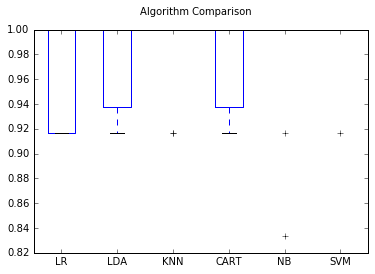

In [6]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [10]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
             precision    recall  f1-score   support

Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
Iris-virginica       0.90      0.82      0.86        11

avg / total       0.90      0.90      0.90        30

